# Using Python for Research Homework: Week 4, Case Study 3

Homophily is a property of networks.  Homophily occurs when nodes that are neighbors in a network also share a characteristic more often than nodes that are not network neighbors.  In this case study, we will investigate homophily of several characteristics of individuals connected in social networks in rural India.

### Exercise 1
In Exercise 1, we will calculate the chance homophily for an arbitrary characteristic. Homophily is the proportion of edges in the network whose constituent nodes share that characteristic.

How much homophily do we expect by chance? If characteristics are distributed completely randomly, the probability that two nodes \(x\) and \(y\) share characteristic \(a\) is the probability both nodes have characteristic \(a\) , which is the marginal probability of \(a\) squared. The total probability that nodes \(x\) and \(y\) share their characteristic is therefore the sum of the square of the marginal probabilities of each characteristic in the network.

<strong>Instructions</strong>
<ul><li>Create a function <code>marginal_prob</code> that takes a dictionary <code>chars</code> with personal IDs as keys and characteristics as values; it should return a dictionary with characteristics as keys and their marginal probability (frequency of occurence of a characteristic divided by the sum of frequencies of each characteristic) as values.</li>
<li>Create a function <code>chance_homophily(chars)</code> that takes a dictionary <code>chars</code> defined as above and computes the chance homophily (homophily due to chance alone) for that characteristic.</li>
<li>A sample of three peoples' favorite colors is given in <code>favorite_colors</code>. Use your function to compute the chance homophily in this group, and store it as <code>color_homophily</code>.</li>
<li>Print <code>color_homophily</code>.</li></ul>

In [2]:
from collections import Counter
import numpy as np

def marginal_prob(chars):
	count=Counter(chars.values())
	tot=sum(count.values())
	for i in count:
		count[i]=count[i]/tot
	return count

favorite_colors = {
    "ankit":  "red",
    "xiaoyu": "blue",
    "mary":   "blue"
}
def chance_homophily(chars):
	color_prob = marginal_prob(chars)
	hom=0
	for i in color_prob:
		hom+=color_prob[i]**2
	return hom


color_homophily = chance_homophily(favorite_colors)
print(color_homophily)

0.5555555555555556


In [ ]:
from collections import Counter
import numpy as np

def marginal_prob(chars):
	count=Counter(chars.values())
	return count
        
def chance_homophily(chars):
    # Enter code here!

favorite_colors = {
    "ankit":  "red",
    "xiaoyu": "blue",
    "mary":   "blue"
}

color_homophily = chance_homophily(favorite_colors)
print(color_homophily)

### Exercise 2

In the remaining exercises, we will calculate actual homophily in these village and compare the obtained values to those obtained by chance. In this exercise, we subset the data into individual villages and store them.

#### Instructions 

- `individual_characteristics.dta` contains several characteristics for each individual in the dataset such as age, religion, and caste. Use the `pandas` library to read in and store these characteristics as a dataframe called `df`.
- Store separate datasets for individuals belonging to Villages 1 and 2 as `df1` and `df2`, respectively.
- Note that some attributes may be missing for some individuals. In this case study, we will ignore rows of data where some column information is missing.
- Use the head method to display the first few entries of `df1`.

In [20]:
import pandas as pd

df  = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@individual_characteristics.csv", low_memory=False, index_col=0)
# print(df)
df1 = df[df.village==1]
df2 = df[df.village==2]
# df2 = # Enter code here!

df2.head()

,village,adjmatrix_key,pid,hhid,resp_id,resp_gend,resp_status,age,religion,caste,...,privategovt,work_outside,work_outside_freq,shgparticipate,shg_no,savings,savings_no,electioncard,rationcard,rationcard_colour
203,2,1,200101,2001,1,1,Head of Household,33,HINDUISM,GENERAL,...,OTHERS,Yes,0.0,No,NaN,No,NaN,Yes,Yes,YELLOW
204,2,6,200201,2002,1,1,Head of Household,35,HINDUISM,GENERAL,...,OTHERS,No,NaN,No,NaN,No,NaN,Yes,Yes,YELLOW
205,2,7,200202,2002,2,2,Spouse of Head of Household,30,HINDUISM,GENERAL,...,OTHERS,No,NaN,Yes,1.0,Yes,1.0,Yes,Yes,YELLOW
206,2,12,200401,2004,1,1,Head of Household,42,HINDUISM,GENERAL,...,OTHERS,No,NaN,No,NaN,Yes,1.0,Yes,Yes,YELLOW
207,2,13,200402,2004,2,2,Spouse of Head of Household,39,HINDUISM,GENERAL,...,NaN,NaN,NaN,Yes,1.0,No,NaN,Yes,Yes,YELLOW


### Exercise 3 

In this exercise, we define a few dictionaries that enable us to look up the sex, caste, and religion of members of each village by personal ID. For Villages 1 and 2, their personal IDs are stored as `pid`.

#### Instructions 
- Define dictionaries with personal IDs as keys and a given covariate for that individual as values. Complete this for the sex, caste, and religion covariates, for Villages 1 and 2.
- For Village 1, store these dictionaries into variables named `sex1`, `caste1`, and `religion1`.
- For Village 2, store these dictionaries into variables named `sex2`, `caste2`, and `religion2`.

In [21]:
sex1 = dict (zip(df1['pid'], df1['resp_gend']))
caste1    = dict (zip(df1['pid'], df1['caste']))
religion1 = dict (zip(df1['pid'], df1['religion']))
sex2 = dict (zip(df2['pid'], df2['resp_gend']))
caste2    = dict (zip(df2['pid'], df2['caste']))
religion2 = dict (zip(df2['pid'], df2['religion']))

# Continue for df2 as well.
religion2

{200101: 'HINDUISM',
 200201: 'HINDUISM',
 200202: 'HINDUISM',
 200401: 'HINDUISM',
 200402: 'HINDUISM',
 200601: 'HINDUISM',
 200602: 'HINDUISM',
 200603: 'HINDUISM',
 200604: 'HINDUISM',
 200901: 'HINDUISM',
 200902: 'HINDUISM',
 201001: 'HINDUISM',
 201002: 'HINDUISM',
 201102: 'HINDUISM',
 201103: 'HINDUISM',
 201201: 'HINDUISM',
 201202: 'HINDUISM',
 201203: 'HINDUISM',
 201204: 'HINDUISM',
 201205: 'HINDUISM',
 201206: 'HINDUISM',
 201301: 'HINDUISM',
 201302: 'HINDUISM',
 201501: 'HINDUISM',
 201502: 'HINDUISM',
 201601: 'HINDUISM',
 201602: 'HINDUISM',
 201801: 'HINDUISM',
 201802: 'HINDUISM',
 202001: 'HINDUISM',
 202002: 'HINDUISM',
 202401: 'HINDUISM',
 202402: 'HINDUISM',
 202501: 'HINDUISM',
 202502: 'HINDUISM',
 202601: 'HINDUISM',
 202602: 'HINDUISM',
 202801: 'HINDUISM',
 202802: 'HINDUISM',
 202803: 'HINDUISM',
 203201: 'HINDUISM',
 203202: 'HINDUISM',
 203301: 'HINDUISM',
 203302: 'HINDUISM',
 203601: 'HINDUISM',
 203602: 'HINDUISM',
 203701: 'HINDUISM',
 203702: 'HIN

In [24]:
caste2[202802]

'OBC'

### Exercise 4

In this exercise, we will print the chance homophily of several characteristics of Villages 1 and 2. 

#### Instructions 
-  Use `chance_homophily` to compute the chance homophily for sex, caste, and religion In Villages 1 and 2. Is the chance homophily for any attribute very high for either village?

In [28]:
# Enter your code here.
hom_sex1=chance_homophily(sex1)
hom_caste1=chance_homophily(caste1)
hom_religion1=chance_homophily(religion1)
hom_sex2=chance_homophily(sex2)
hom_caste2=chance_homophily(caste2)
hom_religion2=chance_homophily(religion2)


In [30]:
print(hom_sex1,hom_caste1,hom_religion1,hom_sex2,hom_caste2,hom_religion2)

0.5027299861680701 0.6741488509791551 0.9804896988521925 0.5005945303210464 0.425368244800893 1.0


### Exercise 5

In this exercise, we will create a function that computes the observed homophily given a village and characteristic.

#### Instructions 
- Complete the function `homophily()`, which takes a network `G`, a dictionary of node characteristics `chars`, and node IDs `IDs`. For each node pair, determine whether a tie exists between them, as well as whether they share a characteristic. The total count of these is `num_ties` and `num_same_ties`, respectively, and their ratio is the homophily of chars in `G`. Complete the function by choosing where to increment `num_same_ties` and `num_ties`.

In [31]:
def homophily(G, chars, IDs):
    """
    Given a network G, a dict of characteristics chars for node IDs,
    and dict of node IDs for each node in the network,
    find the homophily of the network.
    """
    num_same_ties = 0
    num_ties = 0
    for n1, n2 in G.edges():
        if IDs[n1] in chars and IDs[n2] in chars:
            if G.has_edge(n1, n2):
                num_ties+=1
                if chars[IDs[n1]] == chars[IDs[n2]]:
                    num_same_ties+=1
    return (num_same_ties / num_ties)    

### Exercise 6

In this exercise, we will obtain the personal IDs for Villages 1 and 2. These will be used in the next exercise to calculate homophily for these villages.

#### Instructions 
- In this dataset, each individual has a personal ID, or PID, stored in `key_vilno_1.csv` and `key_vilno_2.csv` for villages 1 and 2, respectively. `data_filepath1` and `data_filepath2` contain the URLs to the datasets used in this exercise. Use `pd.read_csv` to read in and store `key_vilno_1.csv` and `key_vilno_2.csv` as `pid1` and `pid2` respectively. 

In [52]:
data_filepath1 = "https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@key_vilno_1.csv"
data_filepath2 = "https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@key_vilno_2.csv"

# Enter code here!
pid1=pd.read_csv(data_filepath1,index_col=0)
pid2=pd.read_csv(data_filepath2,index_col=0)
print(pid1.iloc[100])

0    102205
Name: 100, dtype: int64


### Exercise 7

In this exercise, we will compute the homophily of several network characteristics for Villages 1 and 2 and compare them to homophily due to chance alone. The networks for these villages have been stored as networkx graph objects `G1` and `G2`.

#### Instructions 

- Use your `homophily()` function to compute the observed homophily for sex, caste, and religion in Villages 1 and 2. Print all six values.
- Use the `chance_homophily()` to compare these values to chance homophily. Are these values higher or lower than that expected by chance?

In [55]:
import networkx as nx
A1 = np.array(pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@adj_allVillageRelationships_vilno1.csv", index_col=0))
A2 = np.array(pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@adj_allVillageRelationships_vilno2.csv", index_col=0))
G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

pid1 = pd.read_csv(data_filepath1, dtype=int)['0'].to_dict()
pid2 = pd.read_csv(data_filepath2, dtype=int)['0'].to_dict()

# Enter your code here!
print("sex 1: ",homophily(G1,sex1,pid1))
print("caste 1: ",homophily(G1,caste1,pid1))
print("religion 1: ",homophily(G1,religion1,pid1))
print("sex 2: ",homophily(G2,sex2,pid2))
print("caste 2: ",homophily(G2,caste2,pid2))
print("religion 2: ",homophily(G2,religion2,pid2))

sex 1:  0.5908629441624366
caste 1:  0.7959390862944162
religion 1:  0.9908629441624366
sex 2:  0.5658073270013568
caste 2:  0.8276797829036635
religion 2:  1.0


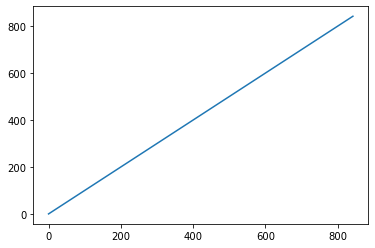

In [58]:
import matplotlib.pyplot as plt
plt.plot(G1)
plt.show()

In [ ]:
print(hom_sex1,hom_caste1,hom_religion1,hom_sex2,hom_caste2,hom_religion2)

0.5027299861680701 0.6741488509791551 0.9804896988521925 0.5005945303210464 0.425368244800893 1.0
